# Click "Edit App" to see the code
## Has the number of hours been steadily increasing over the last 12 months?
Python code to analyse data obtained from the ABC website.
The reported plot clamed a steady increase over the last 12 months.

In [1]:
# python packages
import pandas as pd # Dataframes and reading CSV files
import numpy as np # Numerical libraries
import matplotlib.pyplot as plt # Plotting library
from lmfit import Model # Least squares fitting library
from lmfit.models import StepModel, LinearModel

In [2]:
# Define the figure's parameters
fontsize=28
figureParameters = {'figure.figsize' : (12,8),
                    'legend.fontsize': fontsize*0.7,
                    'axes.labelsize' : fontsize,
                    'axes.titlesize' : fontsize,
                    'xtick.labelsize': fontsize*0.5,
                    'ytick.labelsize': fontsize*0.8,
                    'xtick.direction': "in", # tick marks inside the frame
                    'ytick.direction': "in", # tick marks inside the frame
                    'axes.linewidth' : 3,
                    'axes.titlepad'  : 25}

from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               AutoMinorLocator)
def prettyTicks(ax,xspacing,yspacing):
    # Add tick marks on all sides of the figure
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')

    # Define the spacing of the major tick marks
    # It is useful to call this function with 0
    # for both ticks' spacing to see what the best
    # range looks like
    # number of tick marks
    if (xspacing > 0):
        ax.xaxis.set_major_locator(MultipleLocator(xspacing))
    if (yspacing > 0):
        ax.yaxis.set_major_locator(MultipleLocator(yspacing))
    
    # ax.yaxis.set_minor_locator(AutoMinorLocator())
    # ax.xaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(which='minor', length=6, width=3, color='black')
    ax.tick_params(which='major', length=12, width=3, color='black')

In [3]:
df = pd.read_csv("timing.csv")
print("Input data")

Input data


     Month       Hours
0   Mar-21  132.393548
1   Apr-21   93.380000
2   May-21  123.703226
3   Jun-21  176.360000
4   Jul-21  119.896774
5   Aug-21  210.506452
6   Sep-21  168.566667
7   Oct-21  176.990323
8   Nov-21  146.570000
9   Dec-21  126.329032
10  Jan-22  120.396774
11  Feb-22  155.707143
12  Mar-22  175.012500


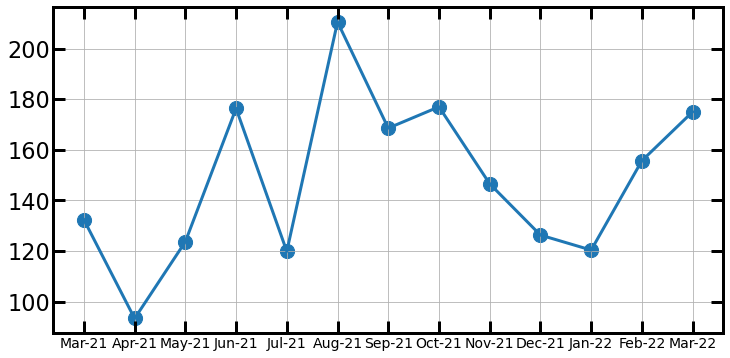

In [4]:
plt.rcParams.update(figureParameters)
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

prettyTicks(ax,0,20)
ax.scatter(df["Month"],df["Hours"],s=200)
ax.plot(df["Month"],df["Hours"],lw=3)

ndata = len(df["Month"])
line_mod = LinearModel()
pars =  line_mod.make_params(intercept=df["Hours"].min(), slope=0)

# for n in range(0,7,1):
#     y=df.iloc[n:ndata,1]
#     x=list(range(n,ndata))
#     result = line_mod.fit(y, pars, x=x)
#     ax.plot(x,result.best_fit,lw=3)
#     print("Months fitted %2i - Slope : %6.3f" % (13-n,result.params["slope"].value))

plt.grid()

print(df)
plt.show()